In [1]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314482 sha256=29cc7479bb9015957f14c9a047f354d24708640ff0d2ec1320c315c82ea4d0e9
  Stored in directory: c:\users\何佳馨\appdata\local\pip\cache\wheels\ca\38\d8\dfdfe73bec1d12026b30cb7ce8da650f3f0ea2cf155ea018ae
Successfully built jieba


14092 : 嘿嘿   205665 : 2222222222222222222222   350801 : 反田   68179 : 登登   2521 : 廠廠   150772 : 簽拉   22090 : 面議   303045 : 皮豆   4577 : 盒   80375 : 賀賀   167853 : 羽彩   23843 : 霍霍   107207 : 輝輝輝   119086 : 〩   27777 : La   346444 : KERO   346435 : OLA   18521 : 金正恩   18522 : 450000   21073 : 啵   36582 : 氷   67836 : yogurt   118133 : 何念茲   118134 : Mimimimimimimimimi   137571 : 台台   141721 : 交換液   160181 : OwO   161707 : 戊戌   165852 : 吉吉覆吉吉   189651 : 贏大錢   202776 : 估摸   204393 : 問鄒智全   205605 : 公三小喇蛤   207701 : 88888888888888   231520 : 艦艦   231697 : ratuo   241864 : ﶝ   298405 : 開眼頭   302975 : airplane   304329 : 郭金發   312655 : wiselike   322391 : 禮義廉   323877 : 牛媽媽   333389 : 額額   348437 : 11111111   188408 : 嘟嚕   19182 : 嫑   63231 : 雜牌   250275 : 弌   100626 : 駄   302470 : PINKY   346736 : 哈連雞   111642 : VI   131500 : READ   142573 : 董滋   288478 : 無駝   154217 : 喂喂   19229 : KD   41660 : 吉利   45551 : 浣腸   57690 : 巴洛克   63194 : tight   65472 : 雙頭龍   89915 : White   111545 : 買上   177444 : N

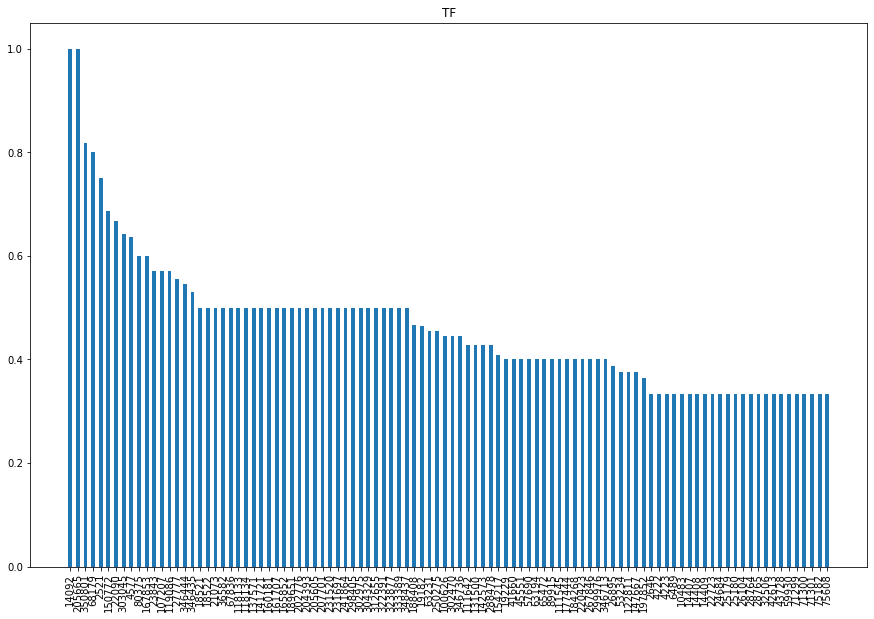

205665 : 2222222222222222222222   14092 : 嘿嘿   350801 : 反田   68179 : 登登   167853 : 羽彩   303045 : 皮豆   150772 : 簽拉   22090 : 面議   107207 : 輝輝輝   119086 : 〩   18522 : 450000   118134 : Mimimimimimimimimi   141721 : 交換液   161707 : 戊戌   165852 : 吉吉覆吉吉   204393 : 問鄒智全   205605 : 公三小喇蛤   207701 : 88888888888888   231697 : ratuo   298405 : 開眼頭   302975 : airplane   322391 : 禮義廉   323877 : 牛媽媽   348437 : 11111111   80375 : 賀賀   67836 : yogurt   118133 : 何念茲   231520 : 艦艦   312655 : wiselike   346444 : KERO   23843 : 霍霍   189651 : 贏大錢   346435 : OLA   2521 : 廠廠   36582 : 氷   202776 : 估摸   304329 : 郭金發   160181 : OwO   333389 : 額額   27777 : La   241864 : ﶝ   302470 : PINKY   346736 : 哈連雞   188408 : 嘟嚕   137571 : 台台   131500 : READ   142573 : 董滋   220423 : 水閘門   267846 : BOKU   299976 : 知味   21073 : 啵   57690 : 巴洛克   177444 : NSFW   346713 : 哈連吉   111642 : VI   4577 : 盒   111545 : 買上   288478 : 無駝   147667 : 蔡菜   45551 : 浣腸   89915 : White   184268 : 先先   28765 : 阻大   75608 : Westdoor   92321 : X

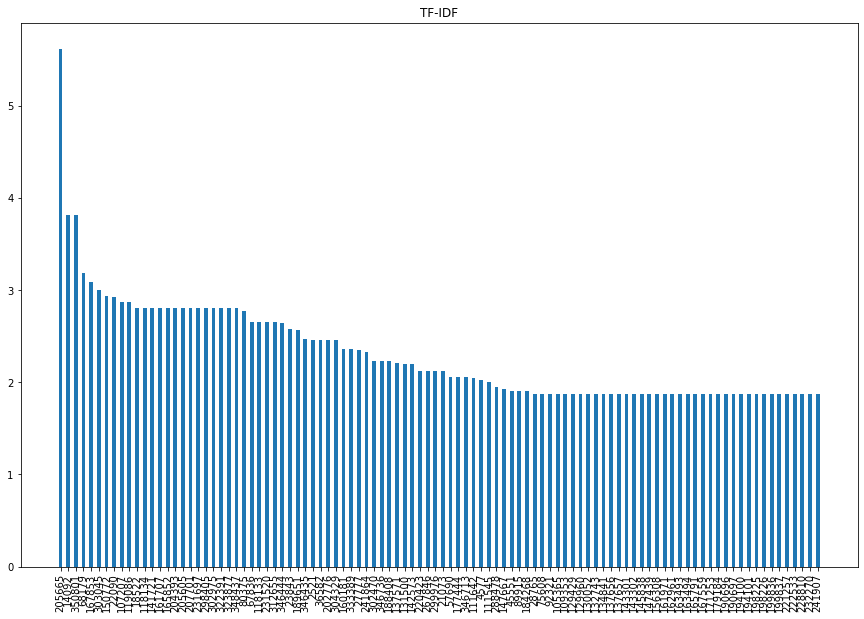

In [11]:
#encoding=utf-8
import jieba
import matplotlib.pyplot as plt
import numpy as np
import math
import re

dict1 = {}#全部的詞各自出現幾次
dict3 = {}#字彙編號
dict4 = {}#每個字的tf
dict5 = {}#每個字的tf-IDF

fp = open('./OneDrive/文件/hw1-dataset.txt', 'rb')
content = fp.readline()
totalnum=0                #全部有幾個詞
number=0                 #字彙編號

def tf(words,dict4,dict2,num):      #計算tf
  for word in words:
    if word==" ":
      continue
    if dict4.get(word):
      continue
    else:
      dict4[word]=dict2[word]/num

def replace_all_blank(value):        #去掉標點符號
  result = re.sub('\W+', ' ', value).replace("_",  '')
  return result

while content:
  words=jieba.cut(replace_all_blank(content.decode()))
  num=0                  #一篇文章有幾個詞
  dict2 = {}#放每一行的詞各自出現幾次
  for word in words:
    if word==" ":
      continue
    if dict2.get(word):
        dict1[word]+=1
        dict2[word]+=1
    else:
        dict2[word]=1
        if dict1.get(word):
            dict1[word]+=1
        else:
            dict1[word]=1
            dict3[word]=number
            number+=1
    num+=1
  words=jieba.cut(replace_all_blank(content.decode()))
  tf(words,dict4,dict2,num)
  totalnum=totalnum+num
  content = fp.readline()

def draw(sort,dict3,num):
  plt.figure(figsize=(15,10))
  w=list()
  y=list()
  for i in range(100):
    w.append(dict3[sort[i][0]])
    y.append(sort[i][1])
    print(dict3[sort[i][0]],":",sort[i][0],"  ", end='')
  x=np.arange(len(w))   
  plt.bar(x, y, width=0.5, tick_label=w)
  if num==1:
    plt.title('TF')
  else:
    plt.title('TF-IDF')
  plt.xticks(rotation=90)
  plt.show()

sort=list()
sort=sorted(dict4.items(), key=lambda x:x[1],reverse=True)[:100]
draw(sort,dict3,1)

sort=sorted(dict1.items(), key=lambda x:x[1],reverse=True)
for i in range(len(dict1)):
  dict5[sort[i][0]]=dict4[sort[i][0]]*math.log(418202/dict1[sort[i][0]],10)

sort=sorted(dict5.items(), key=lambda x:x[1],reverse=True)[:100]
draw(sort,dict3,2)


SyntaxError: invalid syntax (<ipython-input-37-d280653ded63>, line 1)